<a href="https://colab.research.google.com/github/SAIcomsci/Malaria_Detection_DeepLearning/blob/main/Basic_CNN_MalariaDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unzip -u "/content/drive/My Drive/Colab Notebooks/Malaria detection/cell_images.zip" -d "/content/drive/My Drive/Colab Notebooks/Malaria detection/MalariaDataset"

In [ ]:
#import splitfolders
#input_folder='/content/drive/MyDrive/Colab Notebooks/Malaria detection/MalariaDataset/cell_images'
#splitfolders.ratio(input_folder,output='/content/drive/MyDrive/Colab Notebooks/Malaria detection/MalariaDataset/cell_images',seed=42,ratio=(.63,.07,.3),group_prefix=None)

In [ ]:
# import the libraries as shown below
import os
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization,Dropout

# Loading the Data

In [ ]:
train_dir = "/content/drive/MyDrive/Colab Notebooks/Malaria detection/MalariaDataset/cell_images/train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Malaria detection/MalariaDataset/cell_images/test"
val_dir = "/content/drive/MyDrive/Colab Notebooks/Malaria detection/MalariaDataset/cell_images/val"

#Basic Information About Dataset

In [ ]:
print("Train set:")
print("-"*60)
num_Parasited = len(os.listdir(os.path.join(train_dir, 'Parasitized')))
num_Uninfected = len(os.listdir(os.path.join(train_dir, 'Uninfected')))
print(f"Parasited={num_Parasited}")
print(f"Uninfected={num_Uninfected}")

print("\nTest set:")
print('-'*60)
print(f"Parasited={len(os.listdir(os.path.join(test_dir, 'Parasitized')))}")
print(f"Uninfected={len(os.listdir(os.path.join(test_dir, 'Uninfected')))}")

print("\nValidation set")
print('-'*60)
print(f"Parasited={len(os.listdir(os.path.join(val_dir, 'Parasitized')))}")
print(f"Uninfected={len(os.listdir(os.path.join(val_dir, 'Uninfected')))}")

Train set:
------------------------------------------------------------
Parasited=8681
Uninfected=8681

Test set:
------------------------------------------------------------
Parasited=4135
Uninfected=4135

Validation set
------------------------------------------------------------
Parasited=964
Uninfected=964


#Parasitized cells image

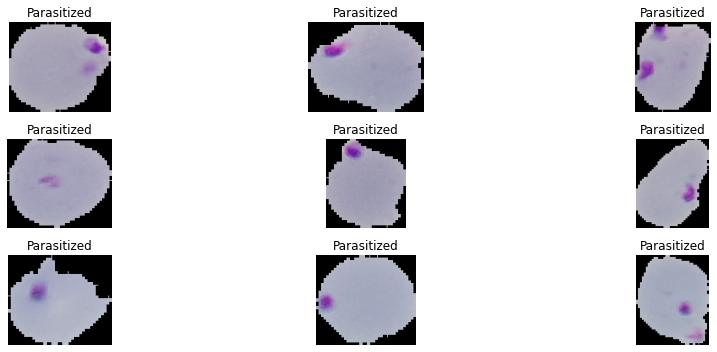

In [ ]:
Parasitized = os.listdir("/content/drive/MyDrive/Colab Notebooks/Malaria detection/MalariaDataset/cell_images/train/Parasitized")
Parasitized_dir = "/content/drive/MyDrive/Colab Notebooks/Malaria detection/MalariaDataset/cell_images/train/Parasitized"

plt.figure(figsize=(15, 5))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(Parasitized_dir, Parasitized[i]))
    plt.title("Parasitized")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

#Uninfected cells image

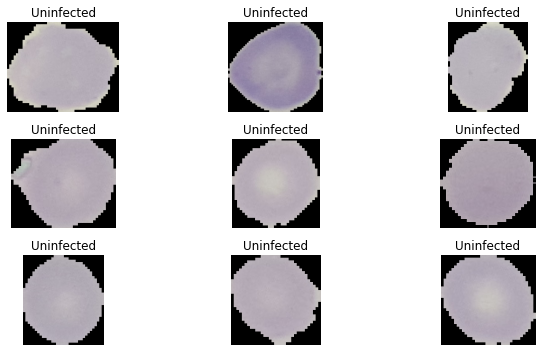

In [ ]:
Uninfected = os.listdir("/content/drive/MyDrive/Colab Notebooks/Malaria detection/MalariaDataset/cell_images/train/Uninfected")
Uninfected_dir = "/content/drive/MyDrive/Colab Notebooks/Malaria detection/MalariaDataset/cell_images/train/Uninfected"

plt.figure(figsize=(10, 5))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(Uninfected_dir, Uninfected[i]))
    plt.title("Uninfected")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()


#Importing necessary libraries

## Data Augmentation
- Using `ImageDataGenerator`, to augment our images so as to create a larger dataset for our model to train on..

In [ ]:

img_Datagen = ImageDataGenerator(
        rescale = 1/255,
        shear_range=10,
        zoom_range=0.3,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.5,2.0],
        width_shift_range = 0.2,
        rotation_range=20,
        fill_mode = 'nearest'
)
val_Datagen = ImageDataGenerator(
        rescale = 1/255
)

In [ ]:

train = img_Datagen.flow_from_directory(train_dir,target_size = (224, 224,),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 17360 images belonging to 2 classes.


In [ ]:
validation= val_Datagen.flow_from_directory(val_dir,
                                            target_size = (224, 224,),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1928 images belonging to 2 classes.


In [ ]:
test = val_Datagen.flow_from_directory(test_dir,
                                       batch_size=64,
                                       class_mode='categorical',
                                       target_size=(224,224,)
                                      )

Found 8270 images belonging to 2 classes.


In [ ]:
print(len(train),len(test),len(validation))

272 130 61


# Defining the model

In [ ]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(filters=128,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 32)      416       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 112, 112, 32)     128       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 112, 112, 32)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 32)      4128      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 32)      

In [ ]:
for i,layer in enumerate(model.layers):
    print(i,layer.name)

0 conv2d_5
1 max_pooling2d_4
2 batch_normalization_6
3 dropout_6
4 conv2d_6
5 max_pooling2d_5
6 batch_normalization_7
7 dropout_7
8 conv2d_7
9 max_pooling2d_6
10 batch_normalization_8
11 dropout_8
12 conv2d_8
13 max_pooling2d_7
14 batch_normalization_9
15 dropout_9
16 flatten_1
17 dense_2
18 batch_normalization_10
19 dropout_10
20 dense_3
21 batch_normalization_11
22 dropout_11
23 dense_4


In [ ]:
MATRICS=[
         tf.keras.metrics.Accuracy(name='accuracy'),
         tf.keras.metrics.Precision(name='precision'),
         tf.keras.metrics.Recall(name='recall')
]

In [ ]:
# tell the model what cost and optimization method to use

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
## fit the model
r = model.fit(
  train, 
  validation_data=validation,
  epochs=25,
  #steps_per_epoch = 100,
  batch_size=64
)

Epoch 1/25
272/272 [==============================] - 4301s 16s/step - loss: 0.5683 - accuracy: 0.7398 - val_loss: 6.0437 - val_accuracy: 0.5000
Epoch 2/25
272/272 [==============================] - 259s 950ms/step - loss: 0.2992 - accuracy: 0.8926 - val_loss: 1.1142 - val_accuracy: 0.6494
Epoch 3/25
272/272 [==============================] - 260s 956ms/step - loss: 0.2725 - accuracy: 0.9040 - val_loss: 0.4010 - val_accuracy: 0.8709
Epoch 4/25
272/272 [==============================] - 260s 956ms/step - loss: 0.2636 - accuracy: 0.9123 - val_loss: 0.2305 - val_accuracy: 0.9087
Epoch 5/25
272/272 [==============================] - 259s 953ms/step - loss: 0.2483 - accuracy: 0.9164 - val_loss: 0.2272 - val_accuracy: 0.9196
Epoch 6/25
272/272 [==============================] - 259s 951ms/step - loss: 0.2395 - accuracy: 0.9185 - val_loss: 0.2110 - val_accuracy: 0.9378
Epoch 7/25
272/272 [==============================] - 260s 957ms/step - loss: 0.2165 - accuracy: 0.9290 - val_loss: 0.2100 - 

In [ ]:
from tensorflow.keras.models import load_model
model.save("Basic_CNN.h5")

# Evaluating the CNN model

In [ ]:
Model=load_model("Basic_CNN.h5")

score = Model.evaluate(test)

print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])

print("-"*80)

score1=Model.evaluate(train)
print("Train Loss: ",score[0])
print("train Accuracy",score[1])

130/130 [==============================] - 1302s 10s/step - loss: 0.1505 - accuracy: 0.9576
Test Loss:  0.1504918485879898
Test Accuracy:  0.9575574398040771
--------------------------------------------------------------------------------
272/272 [==============================] - 253s 927ms/step - loss: 0.1995 - accuracy: 0.9401
Train Loss:  0.1504918485879898
train Accuracy 0.9575574398040771


Text(0.5, 1.0, 'Accuracy Evolution')

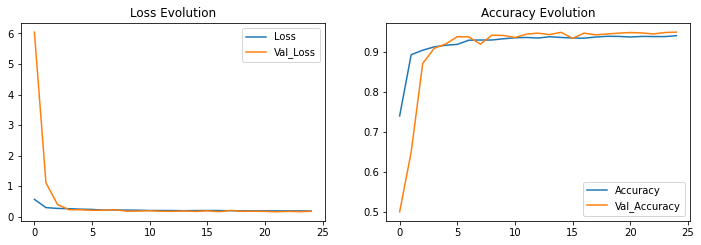

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('EVALUATION OF CNN model')

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

# Observation:
- `Basic CNN` performed well, we got accuracy on test data is `~95%`